# Wandering Filter - Steady State

The wandering filter is applied to both the time transitions and the steady state transitions. Since the steady state transitions are stored in a CSV file, we decided to use Python for easier data analysis rather than Wolfram. For this, we created our containers to interface with the data easily.

In [2]:
from steadystate.crm import CellularRegulatoryMechanism as CRM
import numpy as np
import pandas as pd

CRMS are identified by an unique set of sensed species and by an identification number (from 1 to 146).

In [3]:
regulationFrame = pd.read_csv("data/crmdata.csv")
regulationFrame.iloc[0].to_dict()

{'ID': 1,
 'k23': 'FC',
 'kcia': 'FM',
 'kvac': 'FC',
 'kmit': 'FS',
 'kcyt': 'FC',
 'ko2': 'FS',
 'kmp': 'FM'}

In [4]:
TOTAL_CASES = 146 # change this to how many cases you have
WD_DATA_ROOT = "data/wd/"
WY_DATA_ROOT = "data/wy/"
crms = []
wanderings = []
for i in range(1, TOTAL_CASES + 1):
    fileName = f"case{i}.csv"
    dfile = WD_DATA_ROOT + fileName
    yfile = WY_DATA_ROOT + fileName
    crms.append(CRM(i, regulationFrame.iloc[i - 1].to_dict(), yfile, dfile))
    wanderings.append(crms[-1].getWanderingScore())
print(wanderings)

[24.347554362100105, 558.5920426255648, 24.34708043295427, 557.2718348577141, 24.416849629534454, 557.701499182326, 108.11557544046626, 949.0979116408685, 316.5367002141888, 1110.6559766930059, 121.98050255493723, 955.7883842234332, 32.20697627741941, 391.23971979585315, 32.34068883871346, 32.15645416705437, 390.8059685069302, 32.23927588891783, 389.7097663055754, 391.0327272216864, 396.9965734787046, 130.37553551476535, 828.8605204812168, 307.2657135959561, 442.02293795434144, 307.1279395088544, 475.01440875141395, 307.2559061792214, 444.6647360640296, 307.3253199879245, 445.6307783451906, 759.9647108473707, 548.2812567367364, 24.588154759626114, 558.3101871885455, 24.557103425546494, 557.4935033832958, 56.90976590044662, 560.5961910107744, 203.99739577334623, 682.6620193432807, 122.67303216339441, 1025.8391270394015, 123.79222475102023, 1322.1442083923323, 237.66927592303256, 834.8297563307212, 85.46302925458922, 230.00889384160828, 922.0532473245357, 367.18118784062, 373.24631337786

Once we have all our CRMs for both transitions, we can now rank them by their wandering score.

In [5]:
# define our own sorting function for a CRM
def rankCRM(crm: CRM):
    return crm.getWanderingScore()

# perform an inplace sort
crms.sort(key=rankCRM)

# get 50th percentile and above cases
upperBound = int(np.ceil(146/2.0))
print("Upper Bound Size:", upperBound)
# verify results
for crm in crms[:upperBound]:
    print(crm, crm.getWanderingScore())

Upper Bound Size: 73
Case 69 22.38345201849399
Case 67 22.404833638362945
Case 71 22.475481172038005
Case 123 23.285104798203648
Case 125 23.36615876138501
Case 3 24.34708043295427
Case 1 24.347554362100105
Case 5 24.416849629534454
Case 36 24.557103425546494
Case 34 24.588154759626114
Case 87 30.34855703114839
Case 90 30.34969424193999
Case 92 30.378164794686676
Case 132 31.231124017160294
Case 135 31.254633460421253
Case 89 31.377282987229748
Case 16 32.15645416705437
Case 134 32.19075756339283
Case 13 32.20697627741941
Case 18 32.23927588891783
Case 15 32.34068883871346
Case 79 45.663259300426176
Case 96 55.642963527783564
Case 38 56.90976590044662
Case 73 57.41080570652428
Case 127 59.51022502661271
Case 81 82.21268006124834
Case 98 83.26756092620984
Case 83 85.36785345724721
Case 48 85.46302925458922
Case 99 88.26885408530488
Case 101 90.3078838529425
Case 7 108.11557544046626
Case 11 121.98050255493723
Case 42 122.67303216339441
Case 44 123.79222475102023
Case 22 130.375535514765

In [15]:
targetCases = []
for crm in crms[:upperBound]:
    targetCases.append(str(crm.id))
print("{" +",".join(targetCases) +"}")


{69,67,71,123,125,3,1,5,36,34,87,90,92,132,135,89,16,134,13,18,15,79,96,38,73,127,81,98,83,48,99,101,7,11,42,44,22,75,77,40,129,53,55,49,46,107,109,105,111,26,28,24,30,142,140,144,59,61,57,9,94,51,137,95,52,138,93,136,91,88,133,19,17}


What does a failed case look like? We can see the worst case that is not included in the upper half.

73


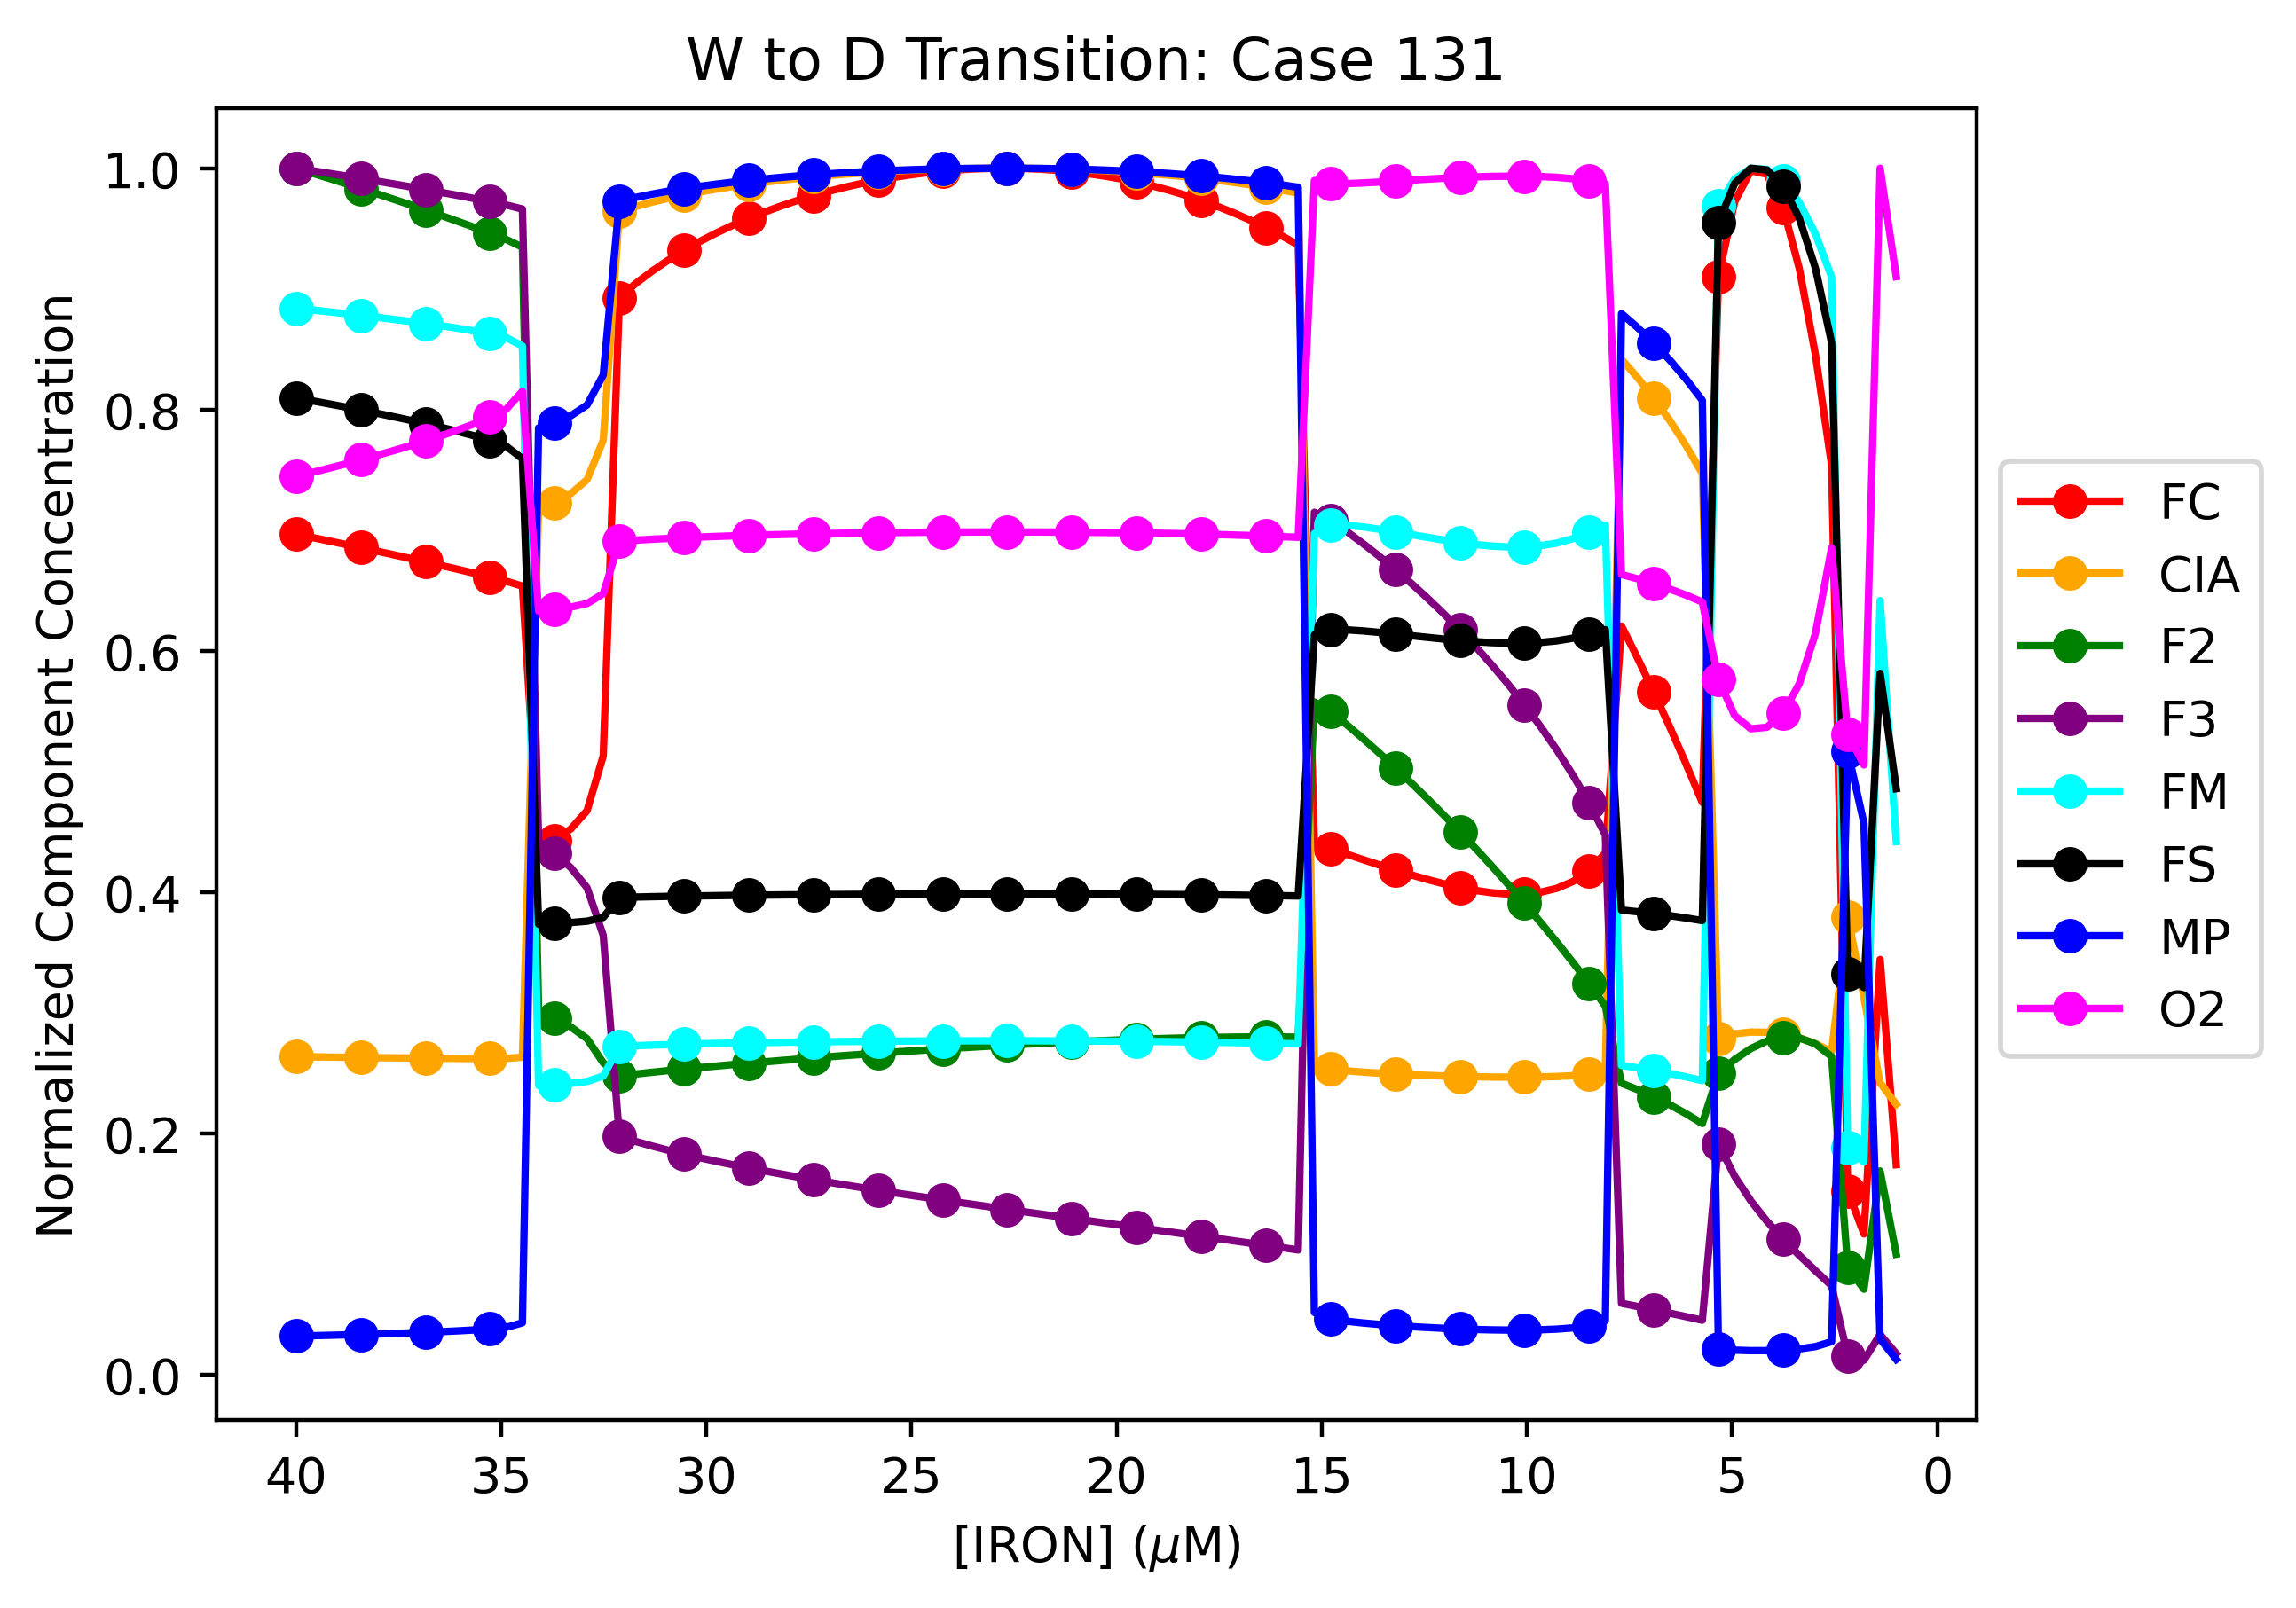

In [35]:
from steadystate.constants import COLOR_MAP, COMPONENTS, IRON
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 400
failedcrm = crms[-1]
targetCases = set(targetCases)
print(len(targetCases))
data = failedcrm.dstate.data
x = data[IRON].values
for component in COMPONENTS:
    plt.plot(x,data[component]/data[component].max(),color=COLOR_MAP[component],marker='o',markevery=4,label=component)
plt.gca().invert_xaxis()
plt.legend(bbox_to_anchor=(1,0.75))
plt.xlabel("[IRON] ($\mu$M)")
plt.ylabel("Normalized Component Concentration")
plt.title(f"W to D Transition: Case {failedcrm.id}")
plt.show()




Case 131 is very chaotic. Let us look at a single component, such as O2. 

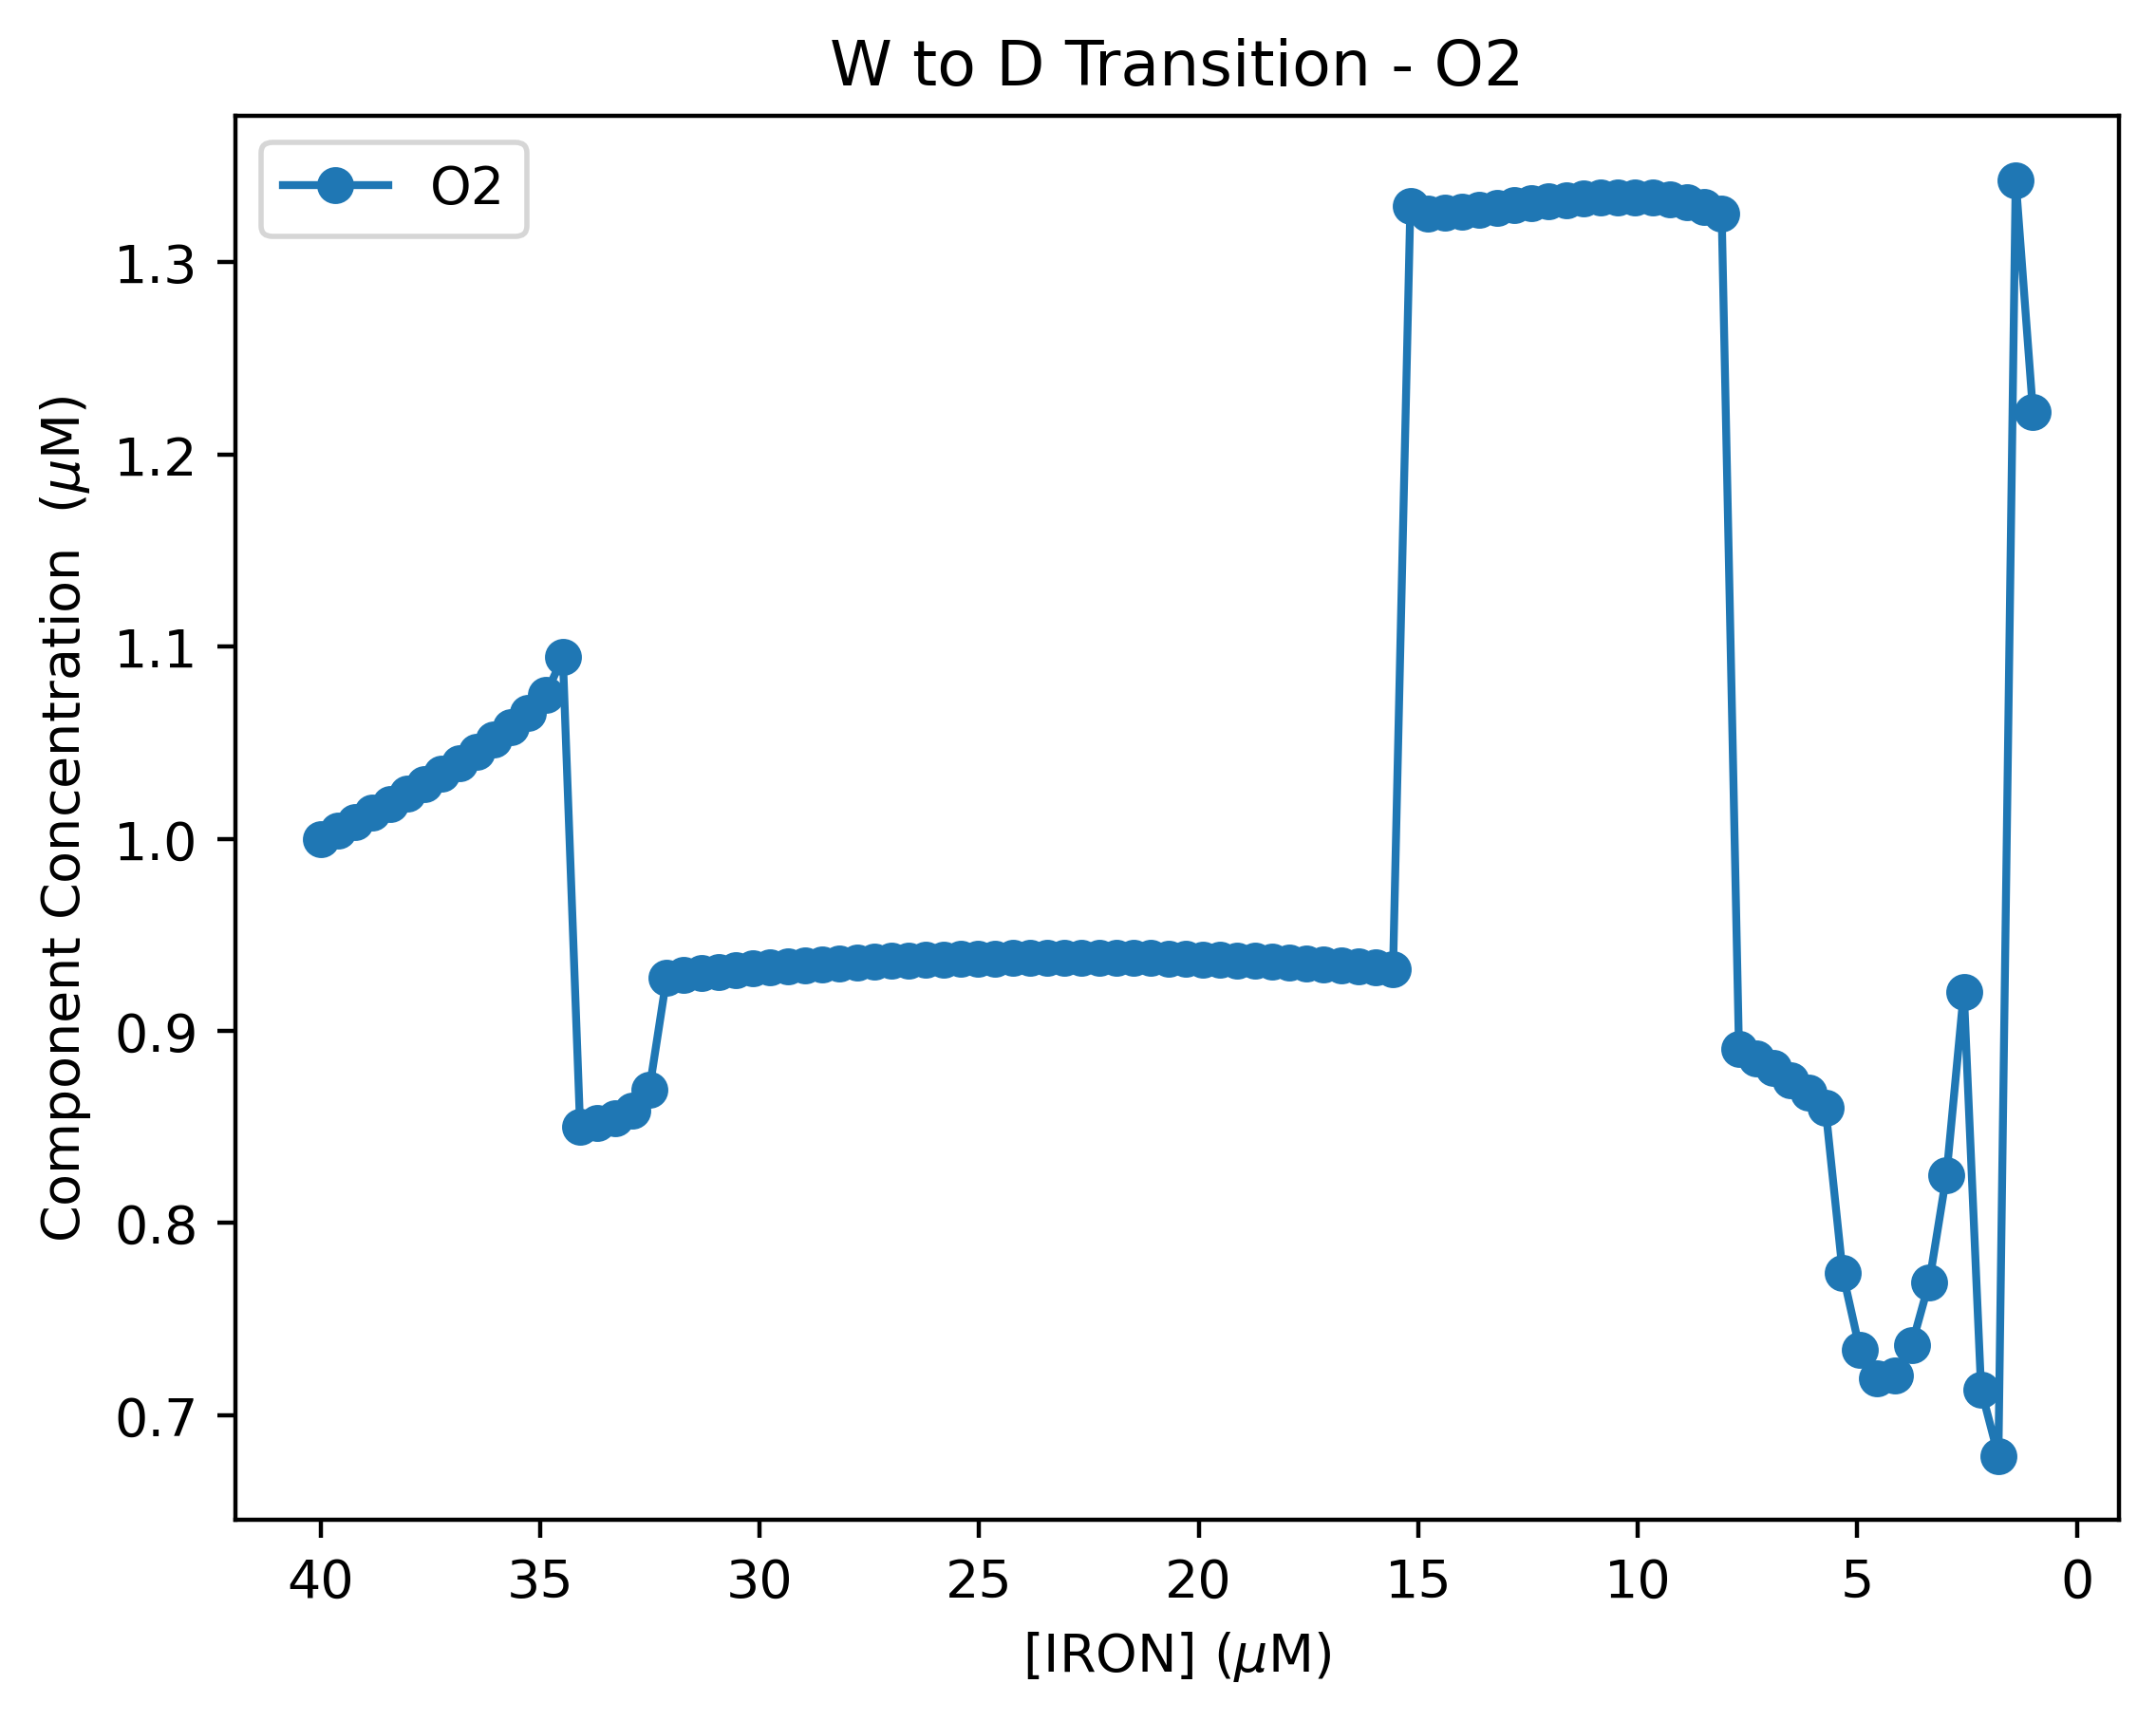

In [38]:
y = failedcrm.dstate.data['O2'].values
plt.plot(x,y,marker='o',label='O2')
plt.title("W to D Transition - O2")
plt.xlabel("[IRON] ($\mu$M)")
plt.gca().invert_xaxis()
plt.ylabel("Component Concentration  ($\mu$M)")
plt.legend()
plt.show()